In [1]:
import numpy as np
import pandas as pd

import warnings
warnings.filterwarnings('ignore')

In [2]:
df=pd.read_csv(r"D:\DATA SCIENCE\Machine Learning\PROJECTS\Spam Mail Prediction\mail_data.csv")
df.sample(5)

,Category,Message
4058,ham,Noice. Text me when you're here
3260,spam,Congratulations! Thanks to a good friend U hav...
3981,spam,ringtoneking 84484
1181,ham,I'm in chennai velachery:)
1908,ham,ELLO BABE U OK?


In [3]:
df.shape

(5572, 2)

# STEPS
1. Data Cleaning
2. EDA
3. Data Preprocessing
4. Model Building
5. Evaluation
6. Improvement
7. Prediction

## Data Cleaning

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Category  5572 non-null   object
 1   Message   5572 non-null   object
dtypes: object(2)
memory usage: 87.2+ KB


In [5]:
# checking for duplicate values
df.duplicated().sum()

415

In [6]:
# remove duplicates
df=df.drop_duplicates()

In [7]:
df.duplicated().sum()

0

In [8]:
df.shape

(5157, 2)

In [9]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()

In [10]:
le.fit_transform(df['Category'])

array([0, 0, 1, ..., 0, 0, 0])

In [11]:
le.classes_

array(['ham', 'spam'], dtype=object)

In [12]:
dict(zip(le.fit_transform(df['Category']), df['Category']))

{0: 'ham', 1: 'spam'}

In [13]:
df['Category']=le.fit_transform(df['Category'])

In [14]:
df.sample(5)

,Category,Message
1857,0,"Say this slowly.? GOD,I LOVE YOU &amp; I NEED ..."
2288,0,Alex knows a guy who sells mids but he's down ...
985,0,Yo guess what I just dropped
3073,0,Ok lor... But buy wat?
4977,0,You are gorgeous! keep those pix cumming :) th...


## EDA

In [15]:
import seaborn as sns
import matplotlib.pyplot as plt

In [16]:
df['Category'].value_counts()

Category
0    4516
1     641
Name: count, dtype: int64

## 
**Data is imbalanced**

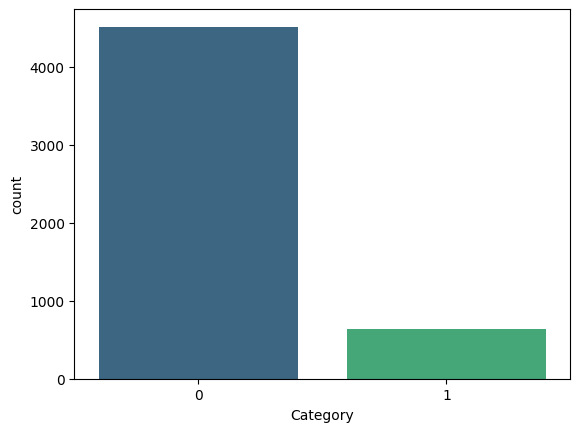

In [17]:
sns.countplot(df,x='Category',palette="viridis")
plt.show()

In [18]:
import nltk

In [19]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\hp\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [20]:
df['num_characters']=df['Message'].apply(len)

In [21]:
df.head()

,Category,Message,num_characters
0,0,"Go until jurong point, crazy.. Available only ...",111
1,0,Ok lar... Joking wif u oni...,29
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155
3,0,U dun say so early hor... U c already then say...,49
4,0,"Nah I don't think he goes to usf, he lives aro...",61


In [22]:
# num of words
df['num_words']=df['Message'].apply(lambda x: len(nltk.word_tokenize(x)))

In [23]:
df['num_sentences']=df['Message'].apply(lambda x: len(nltk.sent_tokenize(x)))

In [24]:
df.head()

,Category,Message,num_characters,num_words,num_sentences
0,0,"Go until jurong point, crazy.. Available only ...",111,24,2
1,0,Ok lar... Joking wif u oni...,29,8,2
2,1,Free entry in 2 a wkly comp to win FA Cup fina...,155,37,2
3,0,U dun say so early hor... U c already then say...,49,13,1
4,0,"Nah I don't think he goes to usf, he lives aro...",61,15,1


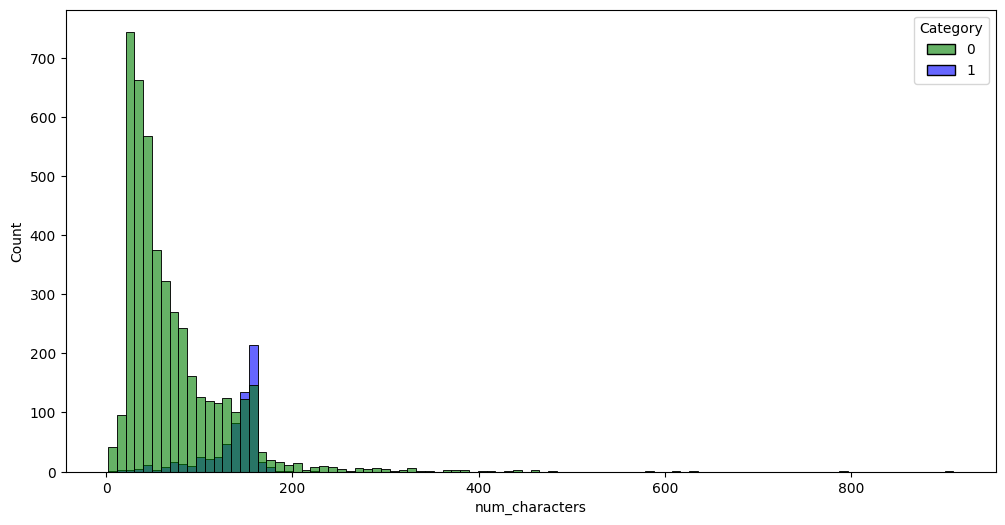

In [25]:
plt.figure(figsize=(12,6))
sns.histplot(df,x='num_characters',hue='Category',palette=['g','blue'],alpha=0.6)
plt.show()

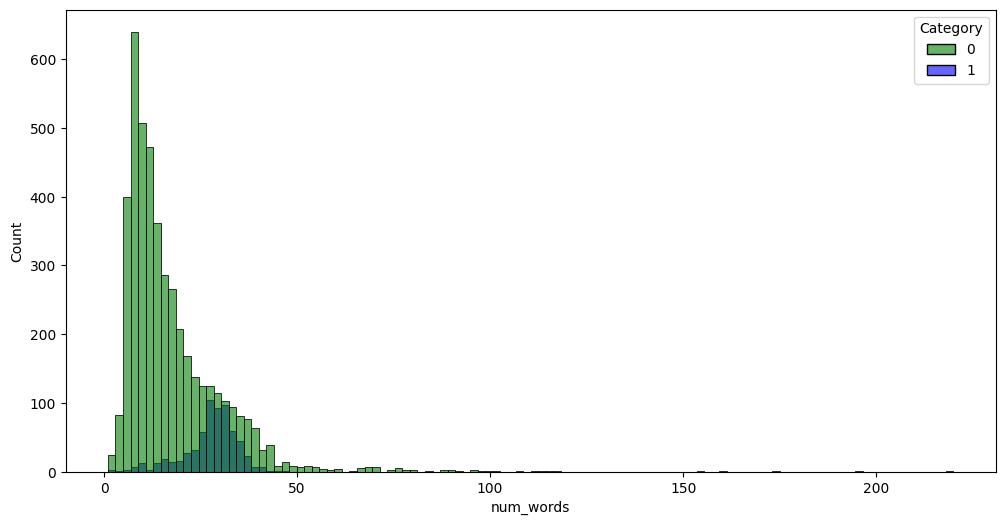

In [26]:
plt.figure(figsize=(12,6))
sns.histplot(df,x='num_words',hue='Category',palette=['g','blue'],alpha=0.6)
plt.show()

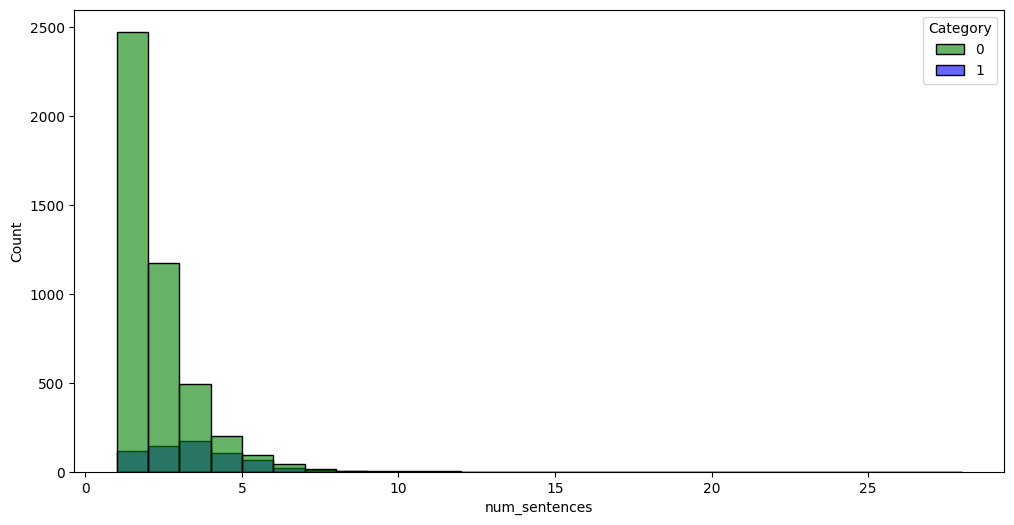

In [27]:
plt.figure(figsize=(12,6))
sns.histplot(df,x='num_sentences',hue='Category',palette=['g','blue'],alpha=0.6,binwidth=1)
plt.show()

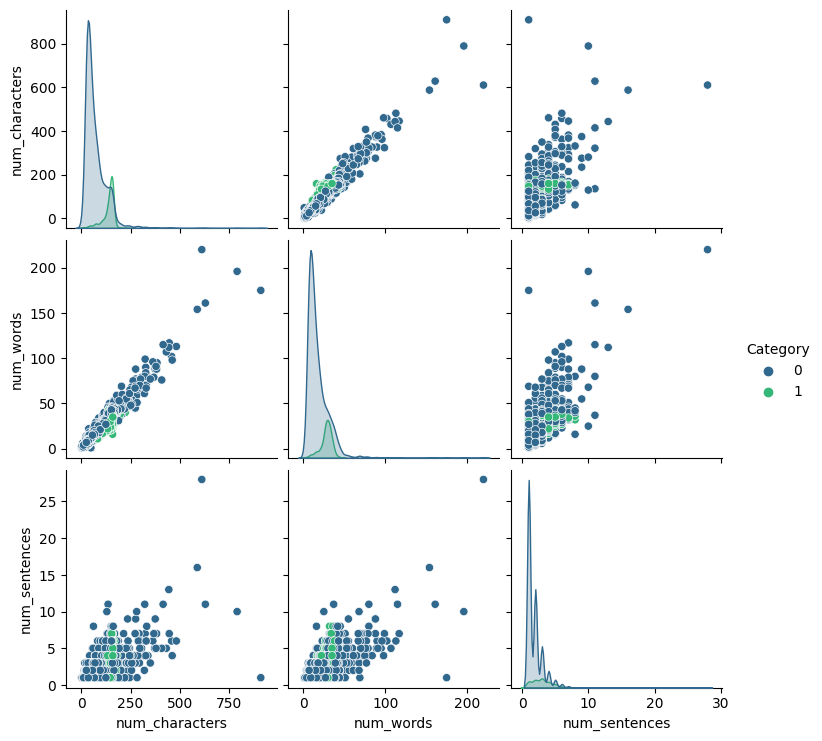

In [28]:
sns.pairplot(df,hue='Category',palette='viridis')

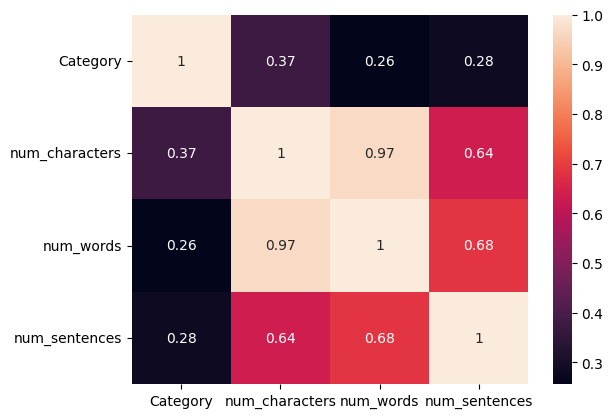

In [29]:
sns.heatmap(df.drop('Message',axis=1).corr(),annot=True)
plt.show()

### 
**Presence of Multicollinearity among features**

## Data Preprocessing
1. Lower case
2. Tokenization
3. Removing special characters
4. Removing stop words and punctuation
5. Stemming :  (e.g. sing,singed,singing convert to sing    &    play,played,playing convert to play)

In [30]:
from nltk.corpus import stopwords
stopwords.words('english')

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

In [31]:
import string
string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [32]:
from nltk.stem.porter import PorterStemmer
ps= PorterStemmer()
ps.stem('singing')

'sing'

In [33]:
def transform_text(text):
    text= text.lower()
    text= nltk.word_tokenize(text)
    
    y=[]
    for i in text:
        if i.isalnum():
            y.append(i)
            
    text = y[:]
    y.clear()
    
    for i in text:
        if i in text:
            if i not in stopwords.words('english') and i not in string.punctuation:
                y.append(i)
    text = y[:]
    y.clear()
    
    for i in text:
        y.append(ps.stem(i))
    return " ".join(y)

In [34]:
transform_text('I have to c@mplete the M@chine LeArning M0dule a$ $oon a$ possible!%?')

'c mplete chine learn m0dule oon possibl'

In [35]:
df['transformed_message']=df['Message'].apply(transform_text)

In [36]:
df.sample(5)

,Category,Message,num_characters,num_words,num_sentences,transformed_message
4147,0,I cant wait for cornwall. Hope tonight isnt ...,157,36,4,wait cornwal hope tonight bad well rock night ...
5505,0,What i told before i tell. Stupid hear after i...,127,30,4,told tell stupid hear wont tell anyth dad call...
4816,0,Ü no home work to do meh...,27,8,1,ü home work meh
3058,0,Just woke up. Yeesh its late. But I didn't fal...,74,25,3,woke yeesh late fall asleep til lt gt
4127,1,"SPJanuary Male Sale! Hot Gay chat now cheaper,...",157,30,4,spjanuari male sale hot gay chat cheaper call ...


In [37]:
!pip install wordcloud

In [38]:
from wordcloud import WordCloud
wc = WordCloud(width=500,height=500,min_font_size=10,background_color='white')

In [39]:
spam_wc=wc.generate(df[df['Category']==1]['transformed_message'].str.cat(sep=" "))


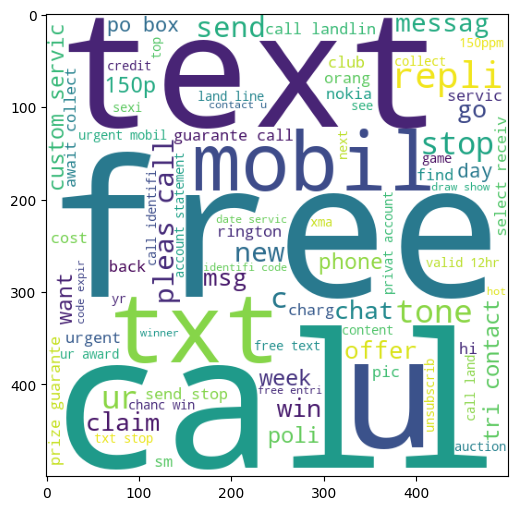

In [40]:
plt.figure(figsize=(14,6))
plt.imshow(spam_wc)
plt.show()

In [41]:
ham_wc=wc.generate(df[df['Category']==0]['transformed_message'].str.cat(sep=" "))

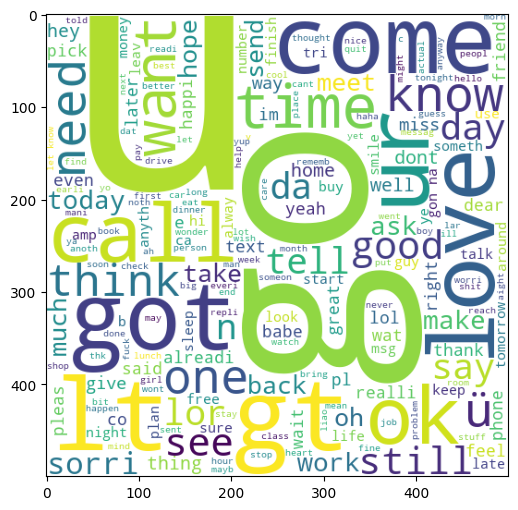

In [42]:
plt.figure(figsize=(14,6))
plt.imshow(ham_wc)
plt.show()

In [43]:
spam_corpus=[]
for msg in df[df['Category']==1]['transformed_message'].tolist():
    for word in msg.split(' '):
        spam_corpus.append(word)

In [44]:
len(spam_corpus)

9781

In [45]:
from collections import Counter
m_c=pd.DataFrame(Counter(spam_corpus).most_common(40))
m_c

,0,1
0,call,311
1,free,186
2,2,154
3,txt,139
4,text,122
5,ur,119
6,u,115
7,mobil,110
8,stop,108
9,repli,103


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'call'),
  Text(1, 0, 'free'),
  Text(2, 0, '2'),
  Text(3, 0, 'txt'),
  Text(4, 0, 'text'),
  Text(5, 0, 'ur'),
  Text(6, 0, 'u'),
  Text(7, 0, 'mobil'),
  Text(8, 0, 'stop'),
  Text(9, 0, 'repli'),
  Text(10, 0, 'claim'),
  Text(11, 0, '4'),
  Text(12, 0, 'prize'),
  Text(13, 0, 'get'),
  Text(14, 0, 'new'),
  Text(15, 0, 'servic'),
  Text(16, 0, 'send'),
  Text(17, 0, 'tone'),
  Text(18, 0, 'urgent'),
  Text(19, 0, 'award'),
  Text(20, 0, 'nokia'),
  Text(21, 0, 'contact'),
  Text(22, 0, 'phone'),
  Text(23, 0, 'cash'),
  Text(24, 0, 'pleas'),
  Text(25, 0, 'week'),
  Text(26, 0, 'win'),
  Text(27, 0, 'min'),
  Text(28, 0, 'c'),
  Text(29, 0, 'guarante'),
  Text(30, 0, 'collect'),
  Text(31, 0, 'messag'),
  Text(32, 0, 'per'),
  Text(33, 0, 'custom'),
  Text(34, 0, 'chat'),
  Text(35, 0,

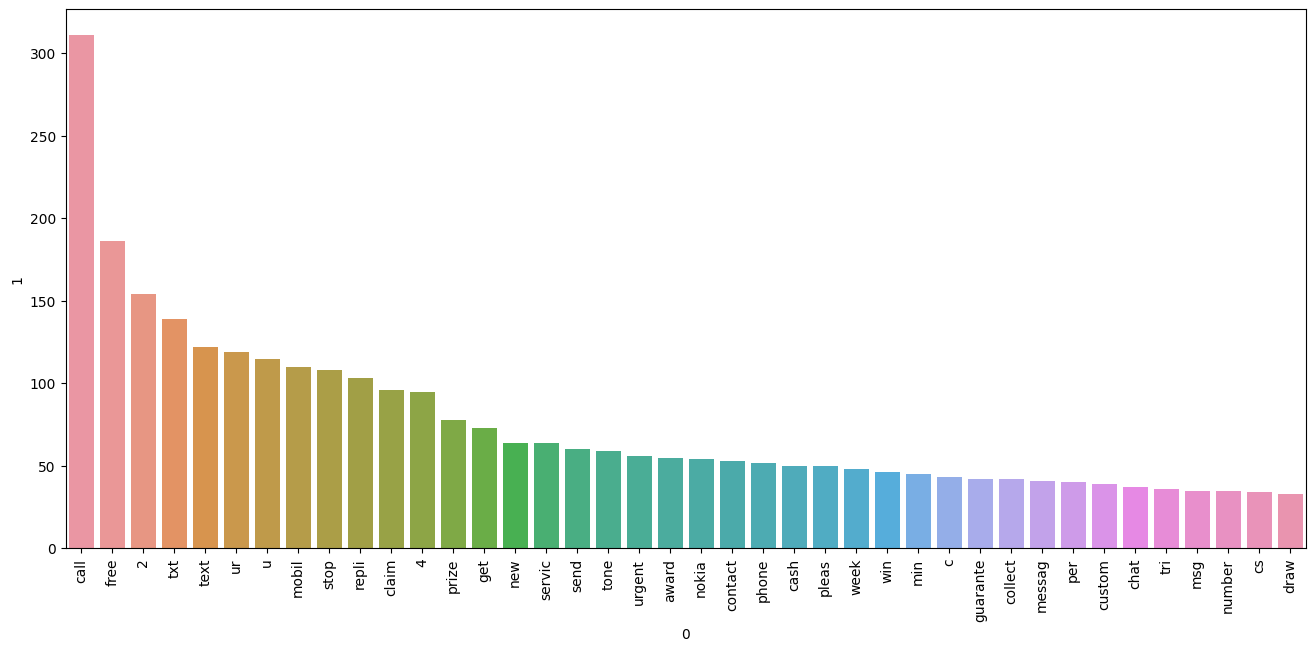

In [46]:
plt.figure(figsize=(16,7))
sns.barplot(m_c,x=0,y=1)
plt.xticks(rotation='vertical')

In [47]:
ham_corpus=[]
for msg in df[df['Category']==0]['transformed_message'].tolist():
    for word in msg.split(' '):
        ham_corpus.append(word)

In [48]:
len(ham_corpus)

35938

In [49]:
from collections import Counter
m_c1=pd.DataFrame(Counter(ham_corpus).most_common(40))
m_c1

,0,1
0,u,897
1,go,407
2,get,351
3,2,288
4,gt,288
5,lt,287
6,come,278
7,got,239
8,know,237
9,like,236


(array([ 0,  1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16,
        17, 18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33,
        34, 35, 36, 37, 38, 39]),
 [Text(0, 0, 'u'),
  Text(1, 0, 'go'),
  Text(2, 0, 'get'),
  Text(3, 0, '2'),
  Text(4, 0, 'gt'),
  Text(5, 0, 'lt'),
  Text(6, 0, 'come'),
  Text(7, 0, 'got'),
  Text(8, 0, 'know'),
  Text(9, 0, 'like'),
  Text(10, 0, 'call'),
  Text(11, 0, 'love'),
  Text(12, 0, 'time'),
  Text(13, 0, 'ok'),
  Text(14, 0, 'good'),
  Text(15, 0, 'want'),
  Text(16, 0, 'ur'),
  Text(17, 0, 'day'),
  Text(18, 0, 'ü'),
  Text(19, 0, 'need'),
  Text(20, 0, 'one'),
  Text(21, 0, '4'),
  Text(22, 0, 'lor'),
  Text(23, 0, 'home'),
  Text(24, 0, 'think'),
  Text(25, 0, 'see'),
  Text(26, 0, 'take'),
  Text(27, 0, 'still'),
  Text(28, 0, 'da'),
  Text(29, 0, 'tell'),
  Text(30, 0, 'make'),
  Text(31, 0, 'say'),
  Text(32, 0, 'back'),
  Text(33, 0, 'today'),
  Text(34, 0, 'hope'),
  Text(35, 0, 'dont'),
  Text(36, 0, 'n'),
  Te

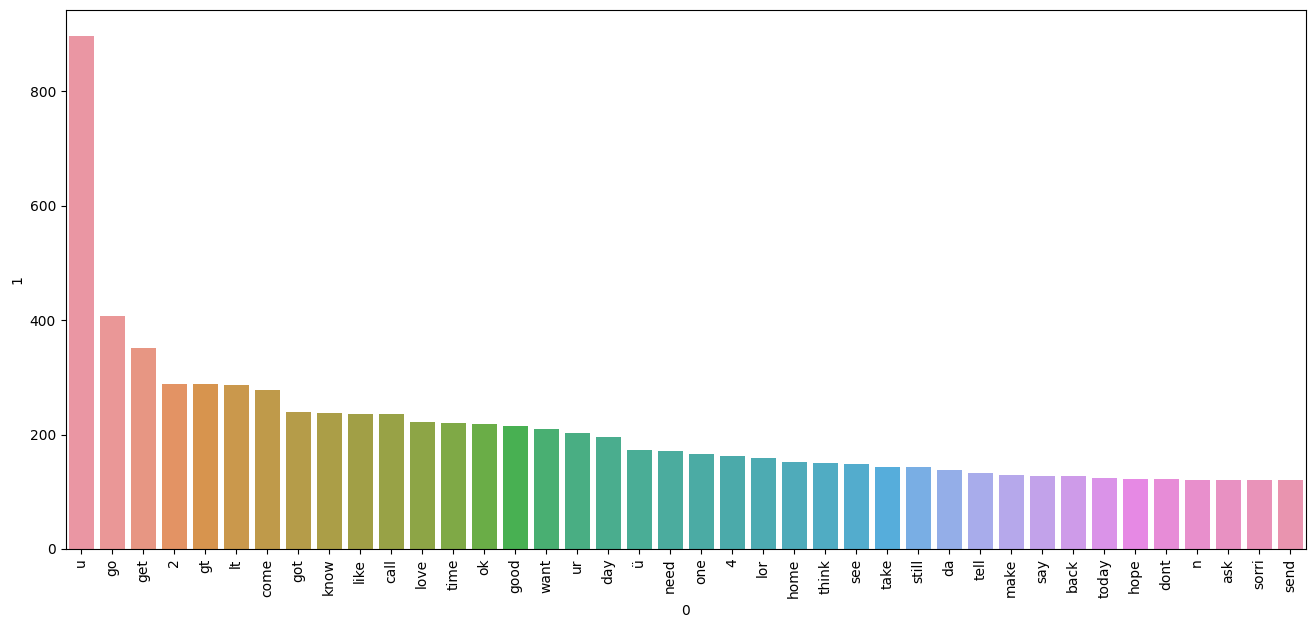

In [50]:
plt.figure(figsize=(16,7))
sns.barplot(m_c1,x=0,y=1)
plt.xticks(rotation='vertical')

## Model Building
**Naive Bayes algorithm performance is better on Textual data**

In [51]:
#Convert text to vector(numeric)
# Bag OF Words(Most frequent words) => CountVectorizer
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv= CountVectorizer()
tfidf=TfidfVectorizer()

In [52]:
#sparse matrix
tfidf.fit_transform(df['transformed_message'])

<5157x6781 sparse matrix of type '<class 'numpy.float64'>'
	with 40752 stored elements in Compressed Sparse Row format>

In [53]:
X = tfidf.fit_transform(df['transformed_message']).toarray()

In [54]:
X

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

In [95]:
tfidf.get_feature_names_out().tolist()

['008704050406',
 '0089',
 '0121',
 '01223585236',
 '01223585334',
 '0125698789',
 '02',
 '0207',
 '02073162414',
 '02085076972',
 '021',
 '050703',
 '0578',
 '07008009200',
 '07046744435',
 '07090201529',
 '07090298926',
 '07099833605',
 '07123456789',
 '0721072',
 '07732584351',
 '07734396839',
 '07742676969',
 '07753741225',
 '0776xxxxxxx',
 '07786200117',
 '077xxx',
 '078',
 '07801543489',
 '07808',
 '07808247860',
 '07808726822',
 '07815296484',
 '07821230901',
 '078498',
 '0789xxxxxxx',
 '0796xxxxxx',
 '07973788240',
 '07xxxxxxxxx',
 '0800',
 '08000407165',
 '08000776320',
 '08000839402',
 '08000930705',
 '08000938767',
 '08001950382',
 '08002888812',
 '08002986030',
 '08002986906',
 '08002988890',
 '08006344447',
 '0808',
 '08081263000',
 '08081560665',
 '0825',
 '0844',
 '08448350055',
 '08448714184',
 '0845',
 '08450542832',
 '08452810071',
 '08452810073',
 '08452810075over18',
 '0870',
 '08700621170150p',
 '08701213186',
 '08701237397',
 '08701417012',
 '08701417012150p',
 '0

In [55]:
X.shape

(5157, 6781)

In [56]:
y = df['Category'].values
y

array([0, 0, 1, ..., 0, 0, 0])

In [57]:
from sklearn.model_selection import train_test_split


In [58]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=19,stratify=y)

In [59]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB,BernoulliNB
from  sklearn.metrics import accuracy_score,confusion_matrix,precision_score,classification_report

In [60]:
gnb=GaussianNB()
mnb=MultinomialNB()
bnb= BernoulliNB()

In [61]:
gnb.fit(X_train,y_train)
y_pred1=gnb.predict(X_test)
print(accuracy_score(y_test,y_pred1))
print(confusion_matrix(y_test,y_pred1))
print(precision_score(y_test,y_pred1))

0.877906976744186
[[803 101]
 [ 25 103]]
0.5049019607843137


In [62]:
mnb.fit(X_train,y_train)
y_pred2=mnb.predict(X_test)
print(accuracy_score(y_test,y_pred2))
print(confusion_matrix(y_test,y_pred2))
print(precision_score(y_test,y_pred2))

0.9515503875968992
[[904   0]
 [ 50  78]]
1.0


In [63]:
bnb.fit(X_train,y_train)
y_pred3=bnb.predict(X_test)
print(accuracy_score(y_test,y_pred3))
print(confusion_matrix(y_test,y_pred3))
print(precision_score(y_test,y_pred3))

0.9718992248062015
[[900   4]
 [ 25 103]]
0.9626168224299065



**'VECTORIZER' : TfidfVectorizer & 'NAIVE BAYES' : MultinomialNB**  => best results

## COMPARISON w.r.t Other ALGORITHMS

In [64]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,BaggingClassifier,GradientBoostingClassifier
from xgboost import XGBClassifier

In [65]:
lrc= LogisticRegression(solver='liblinear',penalty='l1') 
svc =SVC(kernel='sigmoid',gamma=1.0)
knc=KNeighborsClassifier()
mnb=MultinomialNB()
dtc=DecisionTreeClassifier(max_depth=5)
rfc=RandomForestClassifier(n_estimators=50,random_state=19)
abc=AdaBoostClassifier(n_estimators=50,random_state=19)
bc=BaggingClassifier(n_estimators=50,random_state=19)
gbc= GradientBoostingClassifier(n_estimators=50,random_state=19)
xgb=XGBClassifier(n_estimators=50,random_state=19)


In [66]:
clfs={
            'LR' :  lrc,
           'SVC' : svc,
           'KN'  :  knc,
           'NB'  :  mnb,
           'DT'  :  dtc,
            'RF' :  rfc,
'AdaBoost':  abc,
'Bagging' : bc,
          'GB' :  gbc,
        'XGB': xgb,
            
}

In [67]:
def train_classifier(clf,X_train,X_test,y_train,y_test):
    clf.fit(X_train,y_train)
    y_pred= clf.predict(X_test)
    accuracy = accuracy_score(y_test,y_pred)
    precision= precision_score(y_test,y_pred)
    
    return accuracy,precision 



In [68]:
train_classifier(rfc,X_train,X_test,y_train,y_test)

(0.9699612403100775, 0.98989898989899)

In [69]:
accuracy_scores = []
precision_scores = []

for name,clf in clfs.items():
    current_accuracy,current_precision = train_classifier(clf,X_train,X_test,y_train,y_test)
    accuracy_scores.append(current_accuracy)
    precision_scores.append(current_precision)

In [70]:
performance_indicator = pd.DataFrame({'Algorithm':clfs.keys(),'Accuracy':accuracy_scores,'Precision':precision_scores}).sort_values('Precision',ascending=False)
performance_indicator

,Algorithm,Accuracy,Precision
1,SVC,0.971899,1.000000
2,KN,0.905039,1.000000
3,NB,0.951550,1.000000
5,RF,0.969961,0.989899
9,XGB,0.969961,0.936937
0,LR,0.949612,0.931818
6,AdaBoost,0.967054,0.927273
8,GB,0.952519,0.924731
7,Bagging,0.965116,0.877049
4,DT,0.933140,0.810526


## Improvement

### Best performing algorithms in terms of Precision and Accuracy are:
1. SVC
2. NB
3. RF

#### To further improve the results we are Exploring : Voting Ensemble & Stacking

In [71]:
# Voting Classifier
svc =SVC(kernel='sigmoid',gamma=1.0,probability=True)
mnb=MultinomialNB()
rfc=RandomForestClassifier(n_estimators=50,random_state=19)

from sklearn.ensemble import VotingClassifier

In [72]:
voting=VotingClassifier(estimators=[('svm',svc),('nb',mnb),('rf',rfc)],voting='soft')

In [73]:
voting.fit(X_train,y_train)

VotingClassifier(estimators=[('svm',
                              SVC(gamma=1.0, kernel='sigmoid',
                                  probability=True)),
                             ('nb', MultinomialNB()),
                             ('rf',
                              RandomForestClassifier(n_estimators=50,
                                                     random_state=19))],
                 voting='soft')

In [74]:
y_pred = voting.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))

accuracy 0.9728682170542635
precision 1.0


In [75]:
# Applying Stacking
estimators=[('svm',svc),('nb',mnb),('rf',rfc)]
final_estimator= RandomForestClassifier()

from sklearn.ensemble import StackingClassifier

In [76]:
sc = StackingClassifier(estimators=estimators,final_estimator=final_estimator)

In [77]:
sc.fit(X_train,y_train)

StackingClassifier(estimators=[('svm',
                                SVC(gamma=1.0, kernel='sigmoid',
                                    probability=True)),
                               ('nb', MultinomialNB()),
                               ('rf',
                                RandomForestClassifier(n_estimators=50,
                                                       random_state=19))],
                   final_estimator=RandomForestClassifier())

In [78]:
y_pred = sc.predict(X_test)
print('accuracy',accuracy_score(y_test,y_pred))
print('precision',precision_score(y_test,y_pred))

accuracy 0.9767441860465116
precision 0.9193548387096774


### After analysing different algorithms it has been concluded that most efficient algorithm for Spam Mail Prediction is Support Vector Classifier(SVC) with accuracy: 0.971899	 and Precision :  1.000000

In [79]:
 svc.fit(X_train,y_train)

SVC(gamma=1.0, kernel='sigmoid', probability=True)

In [80]:
y_pred=svc.predict(X_test)

In [81]:
confusion_matrix(y_test,y_pred)

array([[904,   0],
       [ 29,  99]], dtype=int64)

In [82]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.97      1.00      0.98       904
           1       1.00      0.77      0.87       128

    accuracy                           0.97      1032
   macro avg       0.98      0.89      0.93      1032
weighted avg       0.97      0.97      0.97      1032



## Prediction:

In [83]:
def manual_testing(input_mail):
    
    # 1. Preprocess
    transformed_mail=transform_text(input_mail)
    # 2. Vectorize
    vector_input=tfidf.transform([transformed_mail]).toarray()
    
     # 3. Predict   
    result=svc.predict(vector_input)[0]
    # 4. Display:
    if result== 1:
        print('Spam')
    else:
        print('ham')
     

In [84]:
mail=str(input())
manual_testing(mail)

 $$$ Guaranteed Instant Cash! Earn $500/day from home. No skills or experience required. Click here now to claim your spot in our exclusive program!
Spam


In [85]:
#TRY:
#   $$$ Guaranteed Instant Cash! Earn $500/day from home. No skills or experience required. Click here now to claim your spot in our exclusive program!